## Project 

### Import Lib

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#permet d'afficher toutes les lignes
#suppress -> chiffres en notation normal et pas en format scientifique
import pandas as pd
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

### Import data 

In [3]:
na_values = ['na']

In [4]:
data = pd.read_csv('./fbref_team_player_stats_against_combined_latest.csv', sep=',',na_values=na_values)

In [5]:
# Filtrage en gardant seulement championnat
data = data.loc[data["League Name"]!='Champions-League']
data = data.loc[data["League Name"]!='Europa-League']
data

Squad  # Pl  Age  Poss  MP  Starts   Min   90s  Gls  Ast  ...  PKwon  \
0       Alavés    26   26  57.3  38     418  3420  38.0   48   31  ...      3   
1       Alavés    30   27  57.3  38     418  3420  38.0   57   44  ...      3   
2       Alavés    30   28  58.3  24     264  2160  24.0   39   29  ...      0   
3       Alavés    30   26  60.2  38     418  3420  38.0   48   28  ...      7   
4       Alavés    32   27  58.9  38     418  3420  38.0   59   36  ...      7   
..         ...   ...  ...   ...  ..     ...   ...   ...  ...  ...  ...    ...   
485  Wolfsburg    29   25  50.8  34     374  3060  34.0   46   31  ...      8   
486     Wolves    21   26  53.1  38     418  3420  38.0   42   32  ...      4   
487     Wolves    21   26  51.7  38     418  3420  38.0   39   28  ...      2   
488     Wolves    21   27  51.9  23     253  2070  23.0   17   10  ...      3   
489     Wolves    27   26  50.7  38     418  3420  38.0   49   34  ...      7   

     PKcon  OG   Recov    Won   Lost  Won%     League Name  League ID  \
0        3   0  3726.0  721.0  702.0  50.7         La-Liga         12   
1        7   1  3326.0  690.0  920.0  42.9         La-Liga         12   
2        6   1  2183.0  476.0  655.0  42.1         La-Liga         12   
3        2   0  3674.0  381.0  376.0  50.3         La-Liga         12   
4        6   0  3621.0  617.0  823.0  42.8         La-Liga         12   
..     ...  ..     ...    ...    ...   ...             ...        ...   
485      6   0  3359.0  543.0  486.0  52.8      Bundesliga         20   
486      4   1  3670.0  645.0  717.0  47.4  Premier-League          9   
487      4   2  3584.0  701.0  719.0  49.4  Premier-League          9   
488      1   1  1996.0  373.0  345.0  51.9  Premier-League          9   
489      3   2  3073.0  595.0  620.0  49.0  Premier-League          9   

        Season  
0    2018-2019  
1    2020-2021  
2    2021-2022  
3    2017-2018  
4    2019-2020  
..         ...  
485  2017-2018  
486  2018-2019  
487  2019-2020  
488  2021-2022  
489  2020-2021  

[490 rows x 159 columns]

### Data preprocessing 

In [6]:
# Colonnes utiles
mycolumns = ['Squad_id','#Pl','Age','Poss','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [7]:
len(mycolumns)

59

In [8]:
# recodage des modalités
data['Season'] = data['Season'].str.split('-')

In [9]:
data['Season'] = [elem[1] for elem in data['Season']]

In [10]:
display(data['Season'])

0      2019
1      2021
2      2022
3      2018
4      2020
       ... 
485    2018
486    2019
487    2020
488    2022
489    2021
Name: Season, Length: 490, dtype: object

In [11]:
data['Squad_id']=data['Squad']+data['Season']

In [12]:
data['Squad_id']

0         Alavés2019
1         Alavés2021
2         Alavés2022
3         Alavés2018
4         Alavés2020
           ...      
485    Wolfsburg2018
486       Wolves2019
487       Wolves2020
488       Wolves2022
489       Wolves2021
Name: Squad_id, Length: 490, dtype: object

In [13]:
data_ok=data[mycolumns]
data_ok

Squad_id    #Pl  Age  Poss   90s  CrdY  CrdR  Gls/90  Ast/90  xG/90  \
0       Alavés2019  433.0   26  57.3  38.0    93     2    1.26    0.82   1.34   
1       Alavés2021  366.0   27  57.3  38.0    80     3    1.50    1.16   1.34   
2       Alavés2022  240.0   28  58.3  24.0    44     0    1.62    1.21   1.39   
3       Alavés2018  423.0   26  60.2  38.0    84     4    1.26    0.74   1.40   
4       Alavés2020  386.0   27  58.9  38.0    87     3    1.55    0.95   1.40   
..             ...    ...  ...   ...   ...   ...   ...     ...     ...    ...   
485  Wolfsburg2018  327.0   25  50.8  34.0    58     2    1.35    0.91   1.46   
486     Wolves2019  433.0   26  53.1  38.0    76     4    1.11    0.84   1.00   
487     Wolves2020  464.0   26  51.7  38.0    85     5    1.03    0.74   0.92   
488     Wolves2022  219.0   27  51.9  23.0    56     2    0.74    0.43   1.32   
489     Wolves2021  393.0   26  50.7  38.0    62     6    1.29    0.89   1.21   

     ...    Succ  Def 3rd_pression  Mid 3rd_pression  Att 3rd_pression  \
0    ...  1455.0            1445.0            2294.0            1002.0   
1    ...  1436.0            1274.0            2192.0             961.0   
2    ...   951.0            1000.0            1381.0             595.0   
3    ...  1643.0            1594.0            2529.0            1172.0   
4    ...  1400.0            1240.0            2286.0             897.0   
..   ...     ...               ...               ...               ...   
485  ...  1561.0            1619.0            2625.0            1238.0   
486  ...  1823.0            2081.0            2750.0            1328.0   
487  ...  1842.0            2061.0            2825.0            1304.0   
488  ...   980.0             962.0            1491.0             793.0   
489  ...  1491.0            1759.0            2450.0            1157.0   

     Touches  Def Pen  Att Pen  Carries    CPA    Fls  
0    23692.0   2177.0    988.0  15576.0  152.0  525.0  
1    23365.0   2268.0    789.0  14725.0  119.0  518.0  
2    15337.0   1520.0    639.0   9678.0   90.0  368.0  
3    24328.0   1910.0    944.0  17348.0  144.0  550.0  
4    24062.0   2001.0    819.0  15610.0  132.0  473.0  
..       ...      ...      ...      ...    ...    ...  
485  20511.0   1798.0    861.0  13600.0  155.0  525.0  
486  25461.0   2225.0    848.0  17285.0  132.0  340.0  
487  23911.0   2332.0    775.0  15397.0  126.0  384.0  
488  14532.0   1344.0    583.0   9422.0  109.0  270.0  
489  23634.0   2274.0    929.0  15226.0  148.0  407.0  

[490 rows x 59 columns]

In [14]:
#Données non normalisées
liste_90 = ['CrdY','CrdR','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [15]:
data_ok_flt=data_ok.copy()

In [16]:
# Boucle pour normaliser les données (qui ne l'étaient pas)
for i in liste_90:
    data_ok_flt[str(i)]=data_ok[str(i)]/data_ok['90s']
del data_ok['90s']
data_ok_flt

Squad_id    #Pl  Age  Poss   90s      CrdY      CrdR  Gls/90  \
0       Alavés2019  433.0   26  57.3  38.0  2.447368  0.052632    1.26   
1       Alavés2021  366.0   27  57.3  38.0  2.105263  0.078947    1.50   
2       Alavés2022  240.0   28  58.3  24.0  1.833333  0.000000    1.62   
3       Alavés2018  423.0   26  60.2  38.0  2.210526  0.105263    1.26   
4       Alavés2020  386.0   27  58.9  38.0  2.289474  0.078947    1.55   
..             ...    ...  ...   ...   ...       ...       ...     ...   
485  Wolfsburg2018  327.0   25  50.8  34.0  1.705882  0.058824    1.35   
486     Wolves2019  433.0   26  53.1  38.0  2.000000  0.105263    1.11   
487     Wolves2020  464.0   26  51.7  38.0  2.236842  0.131579    1.03   
488     Wolves2022  219.0   27  51.9  23.0  2.434783  0.086957    0.74   
489     Wolves2021  393.0   26  50.7  38.0  1.631579  0.157895    1.29   

     Ast/90  xG/90  ...       Succ  Def 3rd_pression  Mid 3rd_pression  \
0      0.82   1.34  ...  38.289474         38.026316         60.368421   
1      1.16   1.34  ...  37.789474         33.526316         57.684211   
2      1.21   1.39  ...  39.625000         41.666667         57.541667   
3      0.74   1.40  ...  43.236842         41.947368         66.552632   
4      0.95   1.40  ...  36.842105         32.631579         60.157895   
..      ...    ...  ...        ...               ...               ...   
485    0.91   1.46  ...  45.911765         47.617647         77.205882   
486    0.84   1.00  ...  47.973684         54.763158         72.368421   
487    0.74   0.92  ...  48.473684         54.236842         74.342105   
488    0.43   1.32  ...  42.608696         41.826087         64.826087   
489    0.89   1.21  ...  39.236842         46.289474         64.473684   

     Att 3rd_pression     Touches    Def Pen    Att Pen     Carries       CPA  \
0           26.368421  623.473684  57.289474  26.000000  409.894737  4.000000   
1           25.289474  614.868421  59.684211  20.763158  387.500000  3.131579   
2           24.791667  639.041667  63.333333  26.625000  403.250000  3.750000   
3           30.842105  640.210526  50.263158  24.842105  456.526316  3.789474   
4           23.605263  633.210526  52.657895  21.552632  410.789474  3.473684   
..                ...         ...        ...        ...         ...       ...   
485         36.411765  603.264706  52.882353  25.323529  400.000000  4.558824   
486         34.947368  670.026316  58.552632  22.315789  454.868421  3.473684   
487         34.315789  629.236842  61.368421  20.394737  405.184211  3.315789   
488         34.478261  631.826087  58.434783  25.347826  409.652174  4.739130   
489         30.447368  621.947368  59.842105  24.447368  400.684211  3.894737   

           Fls  
0    13.815789  
1    13.631579  
2    15.333333  
3    14.473684  
4    12.447368  
..         ...  
485  15.441176  
486   8.947368  
487  10.105263  
488  11.739130  
489  10.710526  

[490 rows x 59 columns]

### Traitement des NaN

In [17]:
data_ok_flt.isna().sum(axis = 0)

Squad_id            0
#Pl                 0
Age                 0
Poss                0
90s                 0
CrdY                0
CrdR                0
Gls/90              0
Ast/90              0
xG/90               0
xA/90               0
Sh/90               0
SoT/90              0
Dist                0
FK                  0
Cmp                 0
Att                 0
TotDist             0
PrgDist             0
Cmp_short           0
Att_short           0
Cmp_medium          0
Att_medium          0
Cmp_long            0
Att_long            0
KP                  0
1/3                 0
PPA                 0
CrsPA               0
Prog                0
SCA90               0
PassLive            0
PassDead            0
Drib                0
Fld                 0
Def                 0
GCA90               0
PassLive_AMB        0
PassDead_AMB        0
Drib_AMB            0
Fld_AMB             0
Def_AMB             0
Tkl                 0
TklW                0
Def 3rd             0
Mid 3rd   

In [18]:
#supprimer car NaN pour la saison 2017-2018
#a voir si données intéressantes pour les autres saisons

data_ok_flt=data_ok_flt.drop(columns=['CrdY'])
data_ok_flt=data_ok_flt.drop(columns=['CrdR'])

In [19]:
data_ok_flt.to_csv('data_ok_flt')

In [20]:
data_ok_flt

Squad_id    #Pl  Age  Poss   90s  Gls/90  Ast/90  xG/90  xA/90  \
0       Alavés2019  433.0   26  57.3  38.0    1.26    0.82   1.34   0.94   
1       Alavés2021  366.0   27  57.3  38.0    1.50    1.16   1.34   0.97   
2       Alavés2022  240.0   28  58.3  24.0    1.62    1.21   1.39   0.97   
3       Alavés2018  423.0   26  60.2  38.0    1.26    0.74   1.40   0.91   
4       Alavés2020  386.0   27  58.9  38.0    1.55    0.95   1.40   0.85   
..             ...    ...  ...   ...   ...     ...     ...    ...    ...   
485  Wolfsburg2018  327.0   25  50.8  34.0    1.35    0.91   1.46   1.03   
486     Wolves2019  433.0   26  53.1  38.0    1.11    0.84   1.00   0.61   
487     Wolves2020  464.0   26  51.7  38.0    1.03    0.74   0.92   0.65   
488     Wolves2022  219.0   27  51.9  23.0    0.74    0.43   1.32   0.87   
489     Wolves2021  393.0   26  50.7  38.0    1.29    0.89   1.21   0.80   

     Sh/90  ...       Succ  Def 3rd_pression  Mid 3rd_pression  \
0    12.95  ...  38.289474         38.026316         60.368421   
1    10.53  ...  37.789474         33.526316         57.684211   
2    13.37  ...  39.625000         41.666667         57.541667   
3    13.89  ...  43.236842         41.947368         66.552632   
4    11.89  ...  36.842105         32.631579         60.157895   
..     ...  ...        ...               ...               ...   
485  13.44  ...  45.911765         47.617647         77.205882   
486  11.89  ...  47.973684         54.763158         72.368421   
487  10.34  ...  48.473684         54.236842         74.342105   
488  12.04  ...  42.608696         41.826087         64.826087   
489  11.47  ...  39.236842         46.289474         64.473684   

     Att 3rd_pression     Touches    Def Pen    Att Pen     Carries       CPA  \
0           26.368421  623.473684  57.289474  26.000000  409.894737  4.000000   
1           25.289474  614.868421  59.684211  20.763158  387.500000  3.131579   
2           24.791667  639.041667  63.333333  26.625000  403.250000  3.750000   
3           30.842105  640.210526  50.263158  24.842105  456.526316  3.789474   
4           23.605263  633.210526  52.657895  21.552632  410.789474  3.473684   
..                ...         ...        ...        ...         ...       ...   
485         36.411765  603.264706  52.882353  25.323529  400.000000  4.558824   
486         34.947368  670.026316  58.552632  22.315789  454.868421  3.473684   
487         34.315789  629.236842  61.368421  20.394737  405.184211  3.315789   
488         34.478261  631.826087  58.434783  25.347826  409.652174  4.739130   
489         30.447368  621.947368  59.842105  24.447368  400.684211  3.894737   

           Fls  
0    13.815789  
1    13.631579  
2    15.333333  
3    14.473684  
4    12.447368  
..         ...  
485  15.441176  
486   8.947368  
487  10.105263  
488  11.739130  
489  10.710526  

[490 rows x 57 columns]

In [21]:
#Séparation des variables 
X = data_ok_flt.drop(['Squad_id'], axis=1)

In [22]:
# Categorical variable
X_cat = data_ok_flt[['Squad_id']]

In [23]:
X_cat

Squad_id
0       Alavés2019
1       Alavés2021
2       Alavés2022
3       Alavés2018
4       Alavés2020
..             ...
485  Wolfsburg2018
486     Wolves2019
487     Wolves2020
488     Wolves2022
489     Wolves2021

[490 rows x 1 columns]

In [24]:
X.columns

Index(['#Pl', 'Age', 'Poss', '90s', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90',
       'Sh/90', 'SoT/90', 'Dist', 'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist',
       'Cmp_short', 'Att_short', 'Cmp_medium', 'Att_medium', 'Cmp_long',
       'Att_long', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'SCA90', 'PassLive',
       'PassDead', 'Drib', 'Fld', 'Def', 'GCA90', 'PassLive_AMB',
       'PassDead_AMB', 'Drib_AMB', 'Fld_AMB', 'Def_AMB', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl_dribble', 'Past', 'Succ',
       'Def 3rd_pression', 'Mid 3rd_pression', 'Att 3rd_pression', 'Touches',
       'Def Pen', 'Att Pen', 'Carries', 'CPA', 'Fls'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer

In [26]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imp_num.fit_transform(X)
X_new = StandardScaler().fit_transform(X_new)

In [27]:
X_new.shape

(490, 56)

### Choix du nombre de clusters avec WCSS

In [28]:
wcss = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_new)
  wcss.append(km.inertia_)

In [29]:
wcss

[27440.0,
 20039.185904639002,
 17855.345510133215,
 16716.487459194126,
 16045.12508720523,
 15522.714136772884,
 14981.990625943814,
 14615.888175840353,
 14098.040306191484,
 13788.687568842988,
 13434.880692143553]

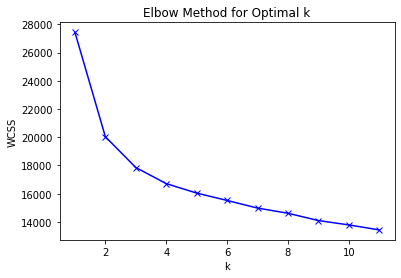

In [30]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

### PCA (Principal Component Analisys)

In [31]:
pca = PCA(n_components=0.8)
df_pca = pca.fit_transform(X_new)

In [32]:
df_pca

array([[ -2.63779232,  -2.66606777,  -0.92379925,  -1.09756609,
         -0.90787591,  -0.46537134,   0.46101461,  -1.72642275,
          1.22608619],
       [ -1.18952248,  -4.19448479,  -1.45737844,   0.34028215,
          1.86454656,  -1.2440019 ,   0.5297524 ,   0.99378681,
          1.37650685],
       [ -2.90509805,  -2.02995841,  -0.85654719,   4.17530638,
          0.71582601,  -0.30212338,   0.14018691,  -1.09386228,
          0.60447136],
       [ -4.5130849 ,  -3.15130067,  -0.91287779,  -2.0182789 ,
         -1.90287668,  -1.28043703,   1.39072864,  -1.56660922,
         -0.3793501 ],
       [ -2.815995  ,  -3.53167289,  -1.10285939,  -0.286961  ,
          0.3152627 ,  -2.9424101 ,  -0.08002105,  -0.30773522,
          1.00838784],
       [ -0.78694781,  -0.87182336,  -0.90069724,  -1.68771466,
         -0.22416155,  -0.56409757,   0.32991252,  -1.13491467,
          0.54447736],
       [ -4.29272856,   3.15613018,   2.85723314,   0.06949019,
          0.92309268,  -1.8373

In [33]:
X_new.shape

(490, 56)

In [34]:
df_pca.shape

(490, 9)

In [35]:
pca.explained_variance_ratio_

array([0.41491624, 0.11279426, 0.0791043 , 0.06685001, 0.04109245,
       0.03557097, 0.02601015, 0.02343002, 0.02065709])

In [36]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [37]:
exp_var

[41.5, 11.3, 7.9, 6.7, 4.1, 3.6, 2.6, 2.3, 2.1]

In [38]:
summ=0
for i in exp_var:
    summ=summ+i

In [39]:
summ

82.09999999999997

### Choix du nombre de clusters avec la méthode de la silhouette

 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters =  2  Average score:  0.2175169943438323
For n_clusters =  3  Average score:  0.14005578811976307
For n_clusters =  4  Average score:  0.12806717383850932
For n_clusters =  5  Average score:  0.10656566208137266
For n_clusters =  6  Average score:  0.09411608567115541
For n_clusters =  7  Average score:  0.08858057176946094
For n_clusters =  8  Average score:  0.08268075106989718
For n_clusters =  9  Average score:  0.08961348410268268
For n_clusters =  10  Average score:  0.09103435669008346
For n_clusters =  11  Average score:  0.09315644577155434


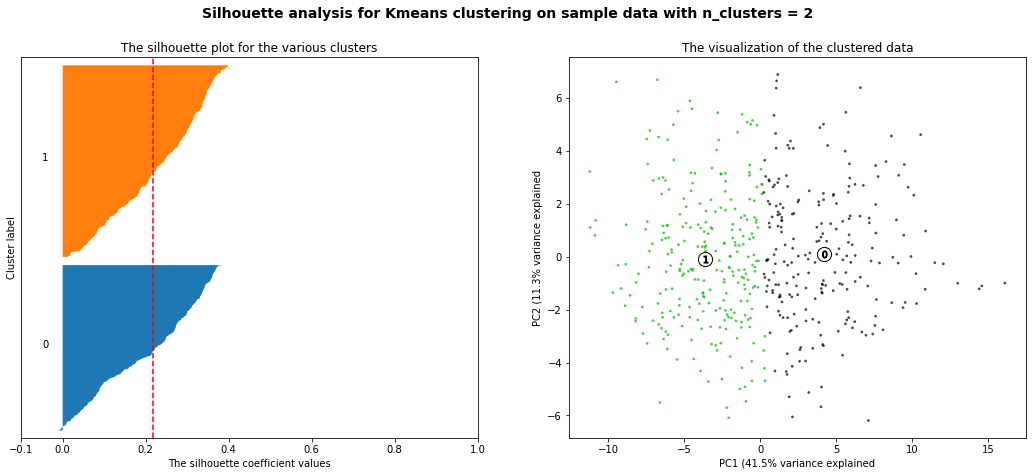

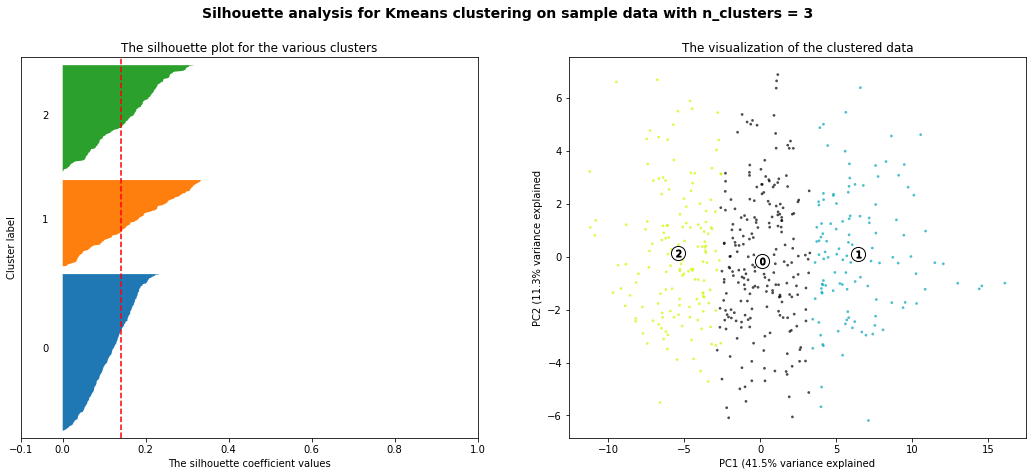

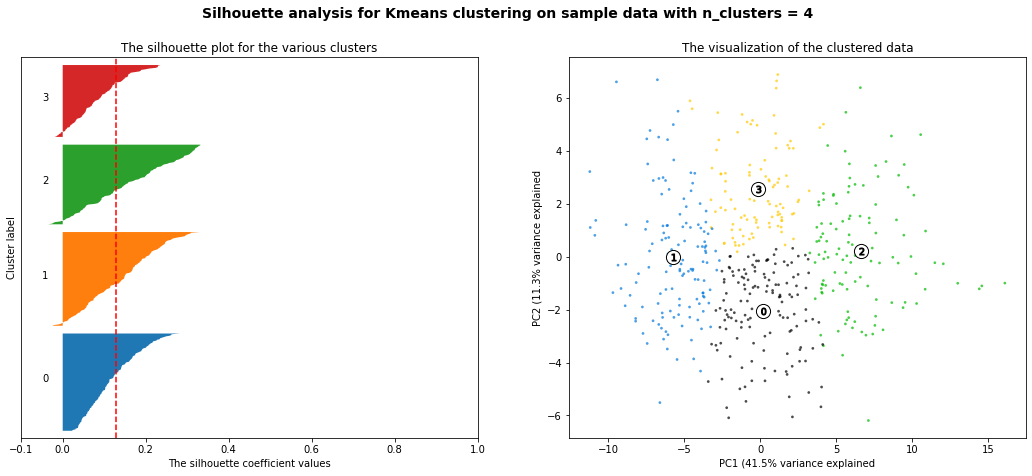

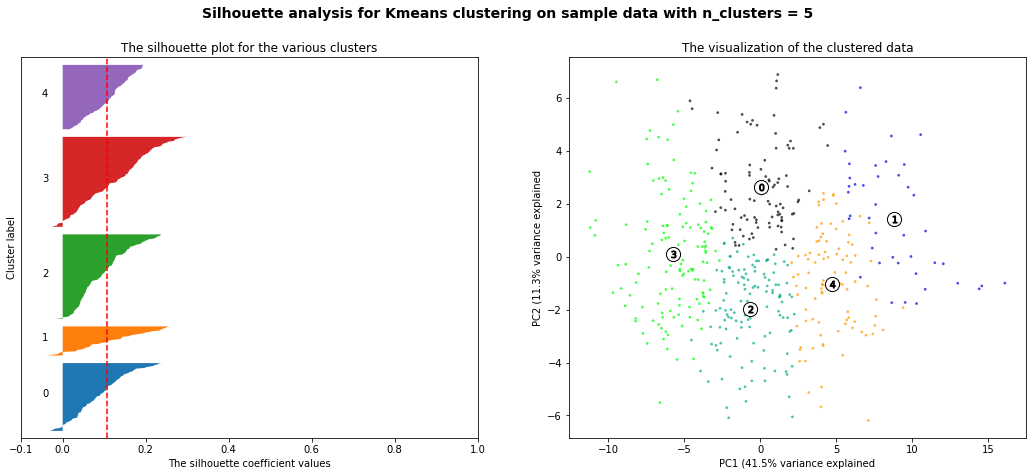

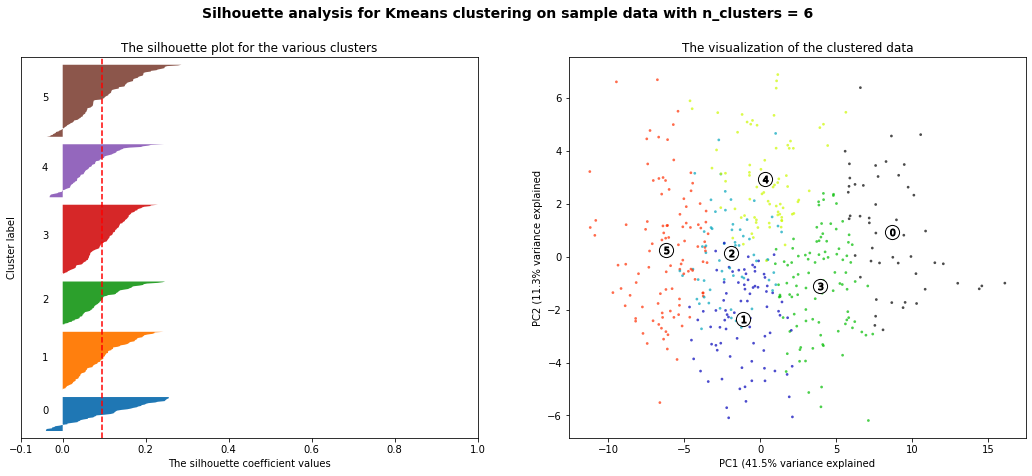

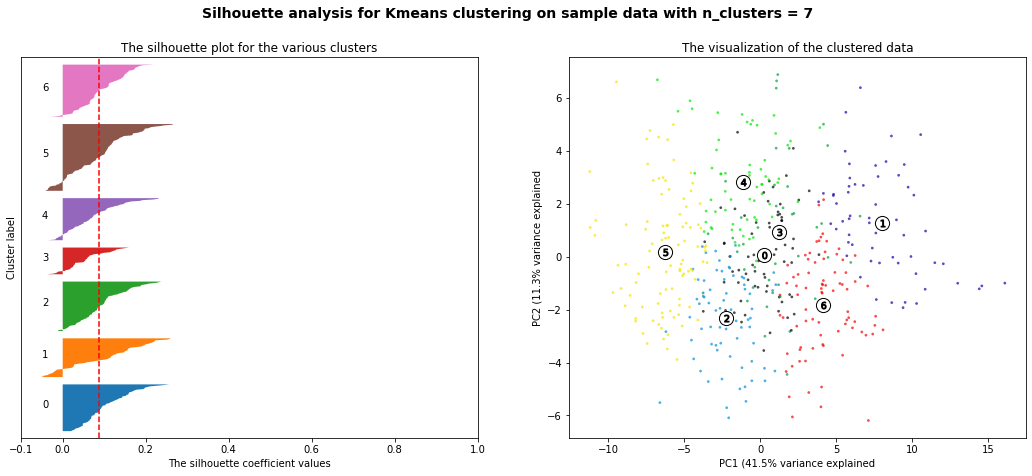

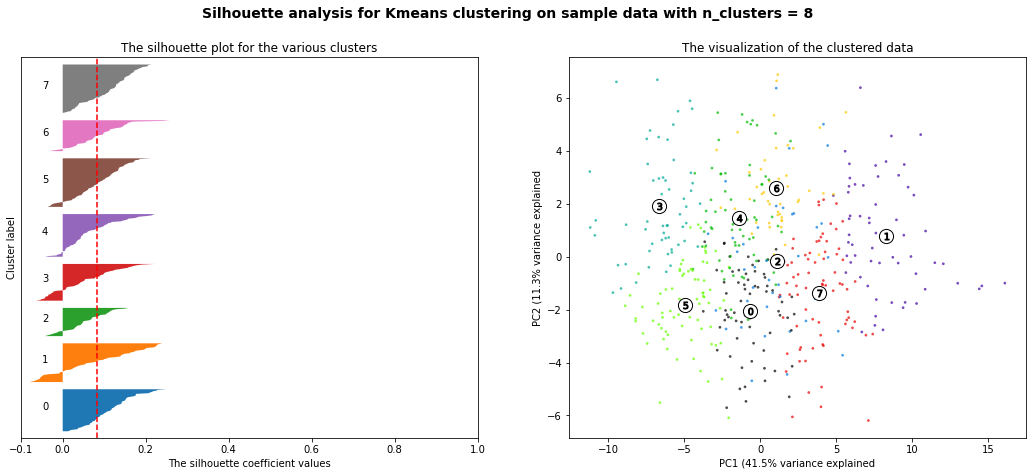

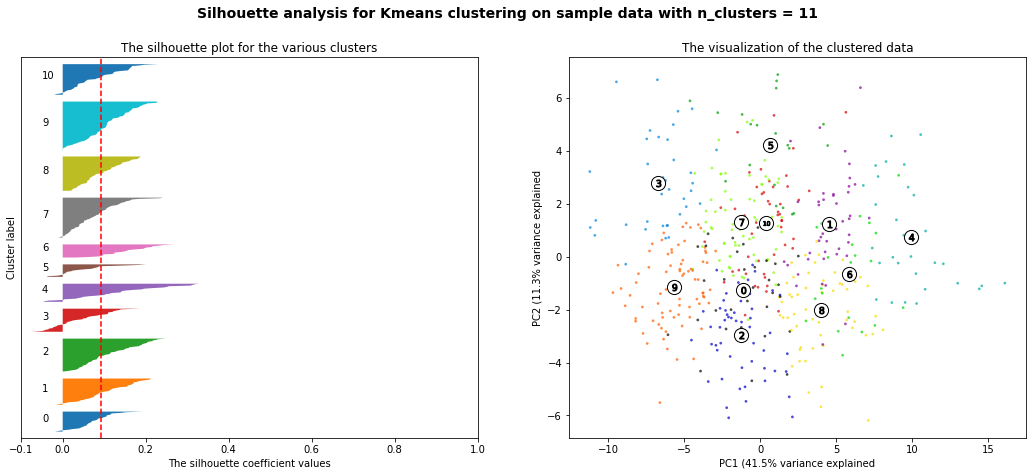

In [40]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_new)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(X_new, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X_new, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

### Application k-means

In [41]:
km = KMeans(n_clusters=2, n_init=100, random_state=0)
km.fit(X_new)

KMeans(n_clusters=2, n_init=100, random_state=0)

In [42]:
print(km.cluster_centers_)

[[ 0.13027571 -0.09201057  0.66100511  0.03094354  0.52867892  0.49891403
   0.59534083  0.59168729  0.61567905  0.60512019 -0.08791002  0.29795809
   0.66827392  0.6759516   0.67217291  0.66363525  0.60877249  0.6305445
   0.65567408  0.66492381  0.60994261  0.49795294  0.62195121  0.6788783
   0.65603949  0.48340039  0.70833988  0.62900553  0.61593857  0.43322233
   0.43491099  0.3741775   0.04493946  0.51747004  0.49633276  0.20248679
   0.27729428  0.22843541  0.09592096 -0.17238829 -0.16518493 -0.35961861
   0.03295945  0.18198641 -0.222464   -0.30301512 -0.09454051 -0.5200134
  -0.35323271  0.00266673  0.66868744 -0.4032075   0.62788567  0.67531304
   0.46163953 -0.05731592]
 [-0.15093618  0.10660256 -0.76583412 -0.03585089 -0.61252228 -0.57803696
  -0.68975612 -0.68552316 -0.71331978 -0.70108638  0.1018517  -0.34521135
  -0.77425569 -0.78315097 -0.77877302 -0.76888137 -0.70531791 -0.73054274
  -0.75965763 -0.77037428 -0.7066736  -0.57692345 -0.72058665 -0.78654182
  -0.76008099 

In [43]:
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 0]


In [44]:
len(km.labels_)

490

In [45]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [46]:
name=['#Pl', 'Age', 'Poss', '90s', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90',
       'Sh/90', 'SoT/90', 'Dist', 'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist',
       'Cmp_short', 'Att_short', 'Cmp_medium', 'Att_medium', 'Cmp_long',
       'Att_long', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'SCA90', 'PassLive',
       'PassDead', 'Drib', 'Fld', 'Def', 'GCA90', 'PassLive_AMB',
       'PassDead_AMB', 'Drib_AMB', 'Fld_AMB', 'Def_AMB', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl_dribble', 'Past', 'Succ',
       'Def 3rd_pression', 'Mid 3rd_pression', 'Att 3rd_pression', 'Touches',
       'Def Pen', 'Att Pen', 'Carries', 'CPA', 'Fls','Group']

In [47]:
len(name)

57

In [48]:
data_final = pd.DataFrame(np.concatenate((X_new,km.labels_.reshape((-1,1))),axis=1),columns=name)

In [49]:
data_final

#Pl       Age      Poss       90s    Gls/90    Ast/90     xG/90  \
0    0.757093 -0.324648  1.121054  0.673639 -0.252625 -0.411625  0.037314   
1    0.000990  1.034990  1.121054  0.673639  0.432223  0.809254  0.037314   
2   -1.420934  2.394628  1.274015 -1.753442  0.774647  0.988795  0.225808   
3    0.644242 -0.324648  1.564643  0.673639 -0.252625 -0.698891  0.263506   
4    0.226693  1.034990  1.365792  0.673639  0.574900  0.055181  0.263506   
..        ...       ...       ...       ...       ...       ...       ...   
485 -0.439129 -1.684286  0.126802 -0.019813  0.004193 -0.088451  0.489698   
486  0.757093 -0.324648  0.478614  0.673639 -0.680655 -0.339809 -1.244442   
487  1.106932 -0.324648  0.264468  0.673639 -0.908938 -0.698891 -1.546032   
488 -1.657922  1.034990  0.295060 -1.926805 -1.736463 -1.812046 -0.038083   
489  0.305688 -0.324648  0.111506  0.673639 -0.167019 -0.160268 -0.452769   

        xA/90     Sh/90    SoT/90  ...  Def 3rd_pression  Mid 3rd_pression  \
0    0.204272  0.267837  0.079920  ...         -1.272261         -0.818104   
1    0.354037 -0.841262 -0.440242  ...         -1.731459         -1.082238   
2    0.354037  0.460326 -0.242085  ...         -0.900785         -1.096265   
3    0.054506  0.698645  0.674390  ...         -0.872141         -0.209560   
4   -0.245024 -0.217966 -0.304009  ...         -1.822762         -0.838821   
..        ...       ...       ...  ...               ...               ...   
485  0.653567  0.492407  0.117074  ...         -0.293523          0.838749   
486 -1.443146 -0.217966 -0.564090  ...          0.435634          0.362730   
487 -1.243459 -0.928340 -1.183330  ...          0.381927          0.556946   
488 -0.145181 -0.149221 -0.353548  ...         -0.884517         -0.379457   
489 -0.494633 -0.410455 -0.403087  ...         -0.429055         -0.414135   

     Att 3rd_pression   Touches   Def Pen   Att Pen   Carries       CPA  \
0           -1.362731  0.316540 -0.786290  0.835047  0.456201  0.224995   
1           -1.568781  0.160947 -0.506755 -0.409190 -0.005144 -0.758867   
2           -1.663849  0.598027 -0.080796  0.983542  0.319316 -0.058238   
3           -0.508378  0.619161 -1.606465  0.559939  1.416842 -0.013517   
4           -1.890420  0.492593 -1.326930 -0.221616  0.474634 -0.371285   
..                ...       ...       ...       ...       ...       ...   
485          0.555278 -0.048861 -1.300729  0.674322  0.252364  0.858104   
486          0.275617  1.158265 -0.638843 -0.040295  1.382688 -0.371285   
487          0.155003  0.420744 -0.310159 -0.496724  0.359162 -0.550169   
488          0.186030  0.467561 -0.652600  0.680095  0.451204  1.062380   
489         -0.583762  0.288942 -0.488324  0.466153  0.266459  0.105739   

          Fls  Group  
0    0.506700    0.0  
1    0.402504    0.0  
2    1.365078    0.0  
3    0.878829    0.0  
4   -0.267328    0.0  
..        ...    ...  
485  1.426077    0.0  
486 -2.247053    0.0  
487 -1.592106    1.0  
488 -0.667932    1.0  
489 -1.249748    0.0  

[490 rows x 57 columns]

In [50]:
data_final['Group'].value_counts()

0.0    263
1.0    227
Name: Group, dtype: int64

## Comparaison de plusieurs Classifieurs 

In [51]:
## Comparaison de plusieurs Classifieurs 

from sklearn.model_selection import KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import KFold,cross_val_score
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,colsample_bytree=0.95,max_depth=4,verbosity=0)
}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [52]:
X_for_predict = data_final.iloc[:, 0:56].values
Y_for_predict = data_final.iloc[:, 56].values

### Run classifieurs

In [53]:
run_classifieurs(X_for_predict,Y_for_predict,clfs)

Accuracy for RF is: 0.947 +/- 0.031 en 2.517s
Accuracy for ADA is: 0.959 +/- 0.034 en 3.773s
Accuracy for ET is: 0.965 +/- 0.027 en 1.252s
Accuracy for KNN is: 0.961 +/- 0.031 en 0.040s
Accuracy for CART is: 0.884 +/- 0.039 en 0.124s
Accuracy for ID3 is: 0.888 +/- 0.036 en 0.105s
Accuracy for Stumb is: 0.894 +/- 0.029 en 0.036s
Accuracy for MLP is: 0.976 +/- 0.022 en 4.148s
Accuracy for XGB is: 0.951 +/- 0.031 en 1.192s


### Création de pipeline

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
P=Pipeline([('SS',StandardScaler()),
            ('classifieur',ExtraTreesClassifier(n_estimators=100,random_state=1))])
P.fit(X_for_predict,Y_for_predict)

pickle.dump(P,open('Foot_clfs_equipfor_ET.pkl','wb'))

In [54]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100,random_state=1) #n_estimators = création du nombre d'arbre 
clf.fit(X_for_predict, Y_for_predict) 
importances=clf.feature_importances_ #importance de chaque variables dans chaques arbres (on calcule leur moyenne)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) #on calcule leur écart-type

sorted_idx = np.argsort(importances)[::-1] #argsort va trier les données et renvoie l'indice de base des valeurs 
#il faut ajouter "[::-1]" pour avoir un ordre décroissant, si on met rien on a un tri croissant 

features =data_final.columns[:-1]
print(features[sorted_idx][:26])

padding = np.arange(26) + 0.5

plt.figure(figsize=(25,25))
plt.barh(padding, importances[sorted_idx][:26],xerr=std[sorted_idx][:26], align='center', color='deeppink')
plt.yticks(padding, features[sorted_idx][:26])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Index(['Prog', 'Att', '1/3', 'Cmp', 'Touches', 'Sh/90', 'TotDist',
       'Cmp_medium', 'KP', 'SoT/90', 'xA/90', 'PPA', 'PrgDist', 'Carries',
       'Att_medium', 'Att Pen', 'PassLive', 'SCA90', 'Cmp_short', 'xG/90',
       'CPA', 'Poss', 'Att_short', 'Cmp_long', 'Gls/90', 'Ast/90'],
      dtype='object')


In [55]:
sorted_idx

array([26, 13, 23, 12, 50,  8, 14, 18, 22,  9,  7, 24, 15, 53, 19, 52, 28,
       27, 16,  6, 54,  2, 17, 20,  4,  5, 47, 33, 29, 34, 21, 25, 30, 51,
       41, 11, 31, 40, 37, 32, 48, 44, 10, 46, 36, 39,  0, 49, 45, 42,  1,
       35, 38, 43, 55,  3])

In [56]:
best_idx = sorted_idx[:26]
best_idx

array([26, 13, 23, 12, 50,  8, 14, 18, 22,  9,  7, 24, 15, 53, 19, 52, 28,
       27, 16,  6, 54,  2, 17, 20,  4,  5])

In [57]:
X_new_idx = data_final.iloc[:,(best_idx)]

In [58]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(X_new_idx)

In [59]:
pca.explained_variance_ratio_

array([0.70653657, 0.15342751, 0.04456618])

In [60]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]
exp_var

[70.7, 15.3, 4.5]

For n_clusters =  2  Average score:  0.3638267464939966
For n_clusters =  3  Average score:  0.27545880897376335
For n_clusters =  4  Average score:  0.2522210795247528
For n_clusters =  5  Average score:  0.2204998752478893
For n_clusters =  6  Average score:  0.20951811501166567
For n_clusters =  7  Average score:  0.19180760056114537
For n_clusters =  8  Average score:  0.1781305908290818
For n_clusters =  9  Average score:  0.16908006152573113
For n_clusters =  10  Average score:  0.17990862395221693
For n_clusters =  11  Average score:  0.15751724928322905


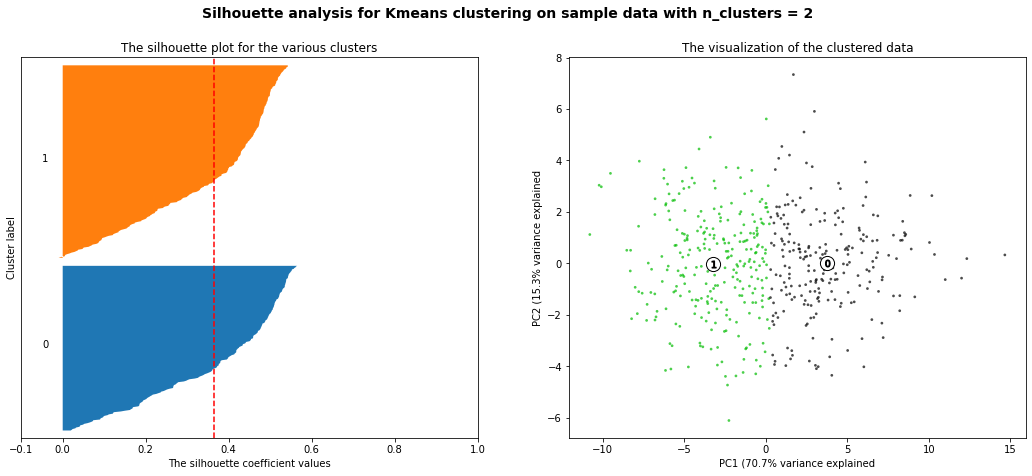

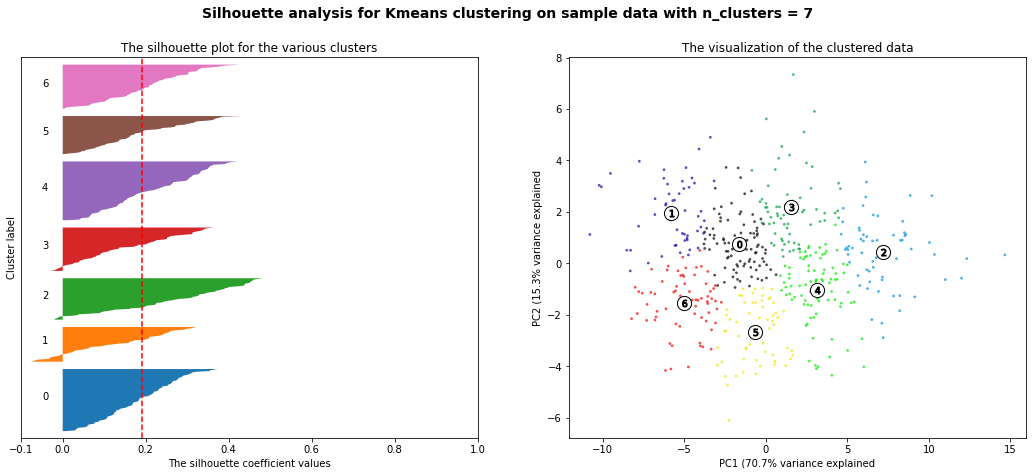

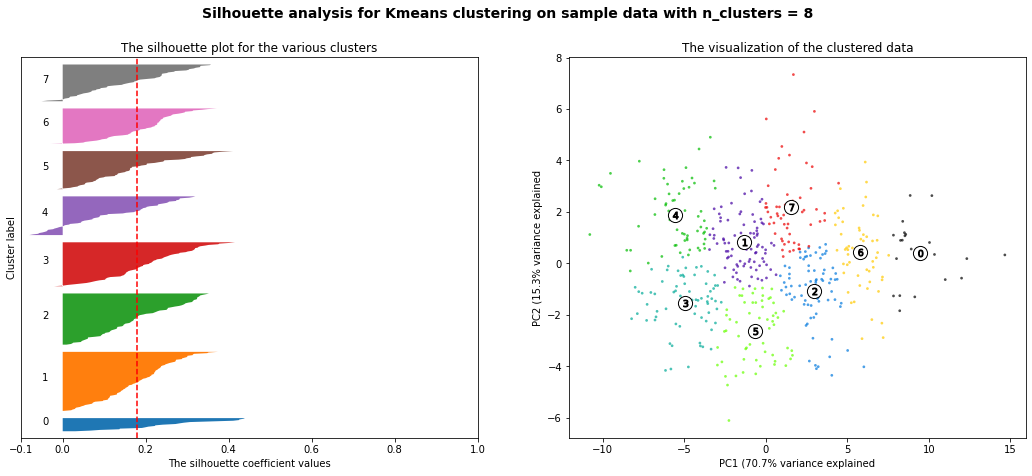

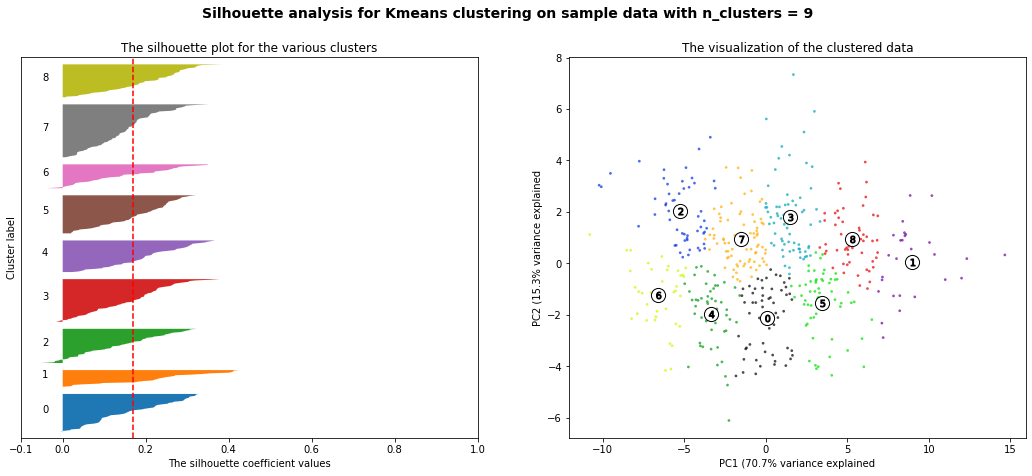

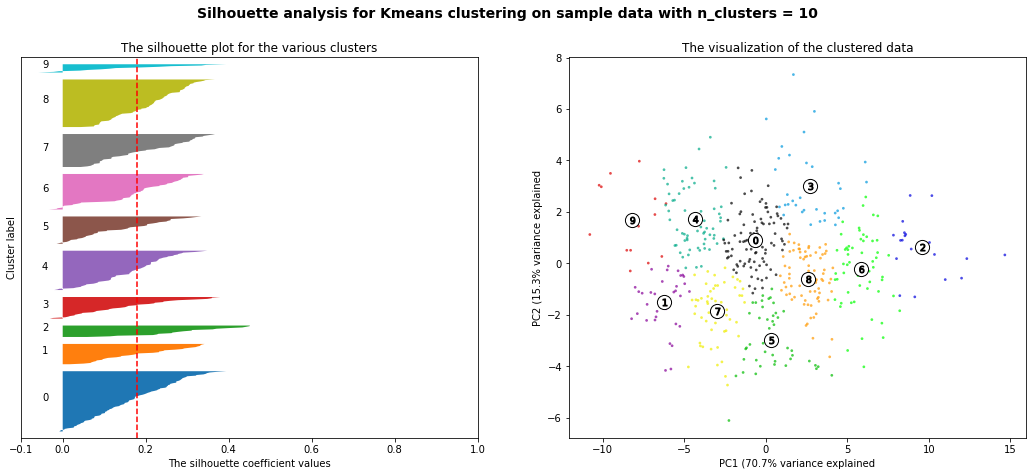

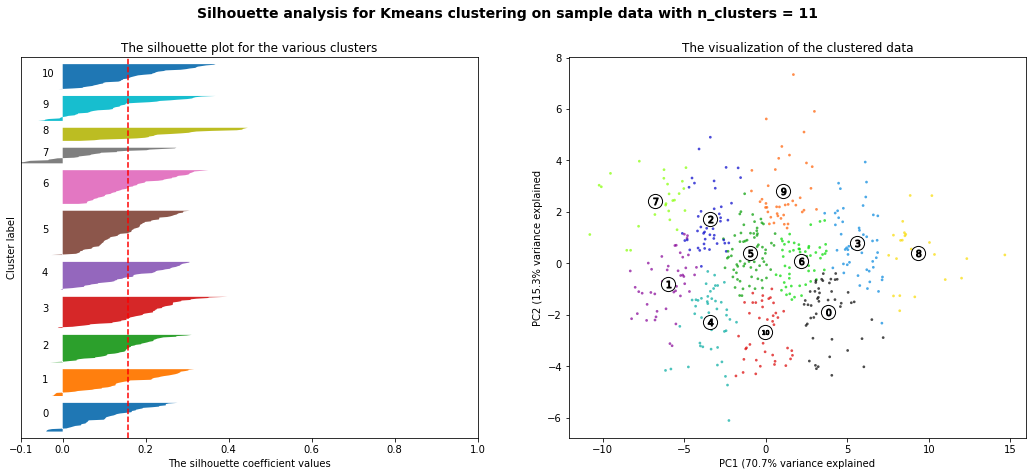

In [61]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_new_idx) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_new_idx)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(X_new_idx, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X_new_idx, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

In [62]:
km = KMeans(n_clusters=3, n_init=100, random_state=0)
km.fit(X_new_idx)

KMeans(n_clusters=3, n_init=100, random_state=0)

In [63]:
name=['Prog', 'xA/90', 'KP', 'Att', 'Sh/90', '1/3', 'SoT/90', 'PrgDist',
       'TotDist', 'Att Pen', 'Carries', 'PassLive', 'Cmp_short', 'CPA',
       'Gls/90', 'GCA90', 'Cmp', 'Cmp_medium', 'Touches', 'PassLive_AMB',
       'PPA', 'Ast/90', 'Poss', 'SCA90', 'Att_medium', 'xG/90','Group']

In [64]:
len(name)

27

In [65]:
data_final_idx = pd.DataFrame(np.concatenate((X_new_idx,km.labels_.reshape((-1,1))),axis=1),columns=name)

In [66]:
data_final_idx['Group'].value_counts()

2.0    219
0.0    165
1.0    106
Name: Group, dtype: int64

In [67]:
indice1_ligne = data_final_idx[data_final_idx.Group==1].index
indice2_ligne = data_final_idx[data_final_idx.Group==2].index
indice0_ligne = data_final_idx[data_final_idx.Group==0].index

In [68]:
indice1_ligne

Int64Index([ 19,  23,  24,  25,  26,  34,  43,  44,  45,  46,
            ...
            377, 404, 405, 408, 429, 432, 436, 437, 463, 464],
           dtype='int64', length=106)

In [71]:
pd.set_option("display.max_rows",300)
cluster1 = data_ok_flt.iloc[indice1_ligne,:1]
cluster2 = data_ok_flt.iloc[indice2_ligne,:1]
cluster0 = data_ok_flt.iloc[indice0_ligne,:1]

display(cluster2)

Squad_id
0             Alavés2019
1             Alavés2021
4             Alavés2020
5             Amiens2019
10            Angers2022
11            Angers2018
15           Arsenal2022
16           Arsenal2019
17           Arsenal2021
18           Arsenal2020
20       Aston Villa2021
22       Aston Villa2022
27          Atalanta2022
28     Athletic Club2022
29     Athletic Club2020
30     Athletic Club2018
31     Athletic Club2021
32     Athletic Club2019
33   Atlético Madrid2021
35   Atlético Madrid2018
36   Atlético Madrid2019
37   Atlético Madrid2020
40          Augsburg2018
58             Betis2018
62           Bologna2022
64           Bologna2020
65           Bologna2021
66          Bordeaux2020
67          Bordeaux2021
68          Bordeaux2018
69          Bordeaux2019
74         Brentford2022
80          Brighton2022
82          Brighton2020
83          Brighton2021
89              Caen2018
97        Celta Vigo2018
99        Celta Vigo2019
101       Celta Vigo2020
104          Chelsea2018
109    Clermont Foot2022
113   Crystal Palace2022
116   Crystal Palace2018
119            Dijon2019
120            Dijon2018
123         Dortmund2019
131            Eibar2020
134   Eint Frankfurt2021
135   Eint Frankfurt2022
136   Eint Frankfurt2020
137   Eint Frankfurt2018
138   Eint Frankfurt2019
139            Elche2022
143         Espanyol2019
144         Espanyol2018
145         Espanyol2020
147          Everton2019
148          Everton2020
152       Fiorentina2019
153       Fiorentina2018
155       Fiorentina2021
156       Fiorentina2020
158         Freiburg2022
163           Fulham2021
170           Getafe2019
173           Getafe2022
174           Getafe2018
175           Girona2018
176           Girona2019
177          Granada2020
179          Granada2021
181         Guingamp2018
183     Hamburger SV2018
186    Hellas Verona2022
187    Hellas Verona2020
188    Hellas Verona2021
193       Hertha BSC2021
195       Hoffenheim2022
196       Hoffenheim2018
197       Hoffenheim2019
198       Hoffenheim2021
202           Huesca2021
203           Huesca2019
204            Inter2018
207            Inter2021
208            Inter2020
210         Juventus2022
211         Juventus2021
214             Köln2022
219       Las Palmas2018
220            Lazio2018
221            Lazio2022
222            Lazio2020
223            Lazio2021
224            Lazio2019
226     Leeds United2021
227     Leeds United2022
228          Leganés2018
229          Leganés2019
230          Leganés2020
233   Leicester City2019
235   Leicester City2018
236             Lens2021
237             Lens2022
239          Levante2022
240          Levante2021
241          Levante2020
246       Leverkusen2022
249            Lille2022
252            Lille2018
263             Lyon2022
264             Lyon2021
265       M'Gladbach2019
266       M'Gladbach2021
267       M'Gladbach2020
268       M'Gladbach2022
271         Mainz 052022
272         Mainz 052018
276         Mallorca2022
282   Manchester Utd2022
283   Manchester Utd2018
284   Manchester Utd2019
285   Manchester Utd2021
291        Marseille2021
293             Metz2021
296            Milan2019
299            Milan2021
302           Monaco2020
304           Monaco2018
305           Monaco2019
306      Montpellier2018
309      Montpellier2019
310      Montpellier2020
311           Málaga2018
314           Nantes2020
315           Nantes2018
316           Nantes2019
318           Napoli2021
320           Napoli2019
327             Nice2022
328             Nice2019
329             Nice2021
330             Nice2020
331             Nice2018
334            Nîmes2019
335            Nîmes2020
338          Osasuna2021
339          Osasuna2022
340          Osasuna2020
350       RB Leipzig2019
354       RB Leipzig2020
356   Rayo Vallecano2019
366    Real Sociedad2019
367            Reims2020
368            Reims2019
370            Reims2022
371           Rennes2020
373           Rennes2019
374           Rennes2018
376             

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import KFold,cross_val_score
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,colsample_bytree=0.95,max_depth=4,verbosity=0)
}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [ ]:
X_for_predict = data_final_idx.iloc[:, 0:26].values
Y_for_predict = data_final_idx.iloc[:, 26].values

In [ ]:
run_classifieurs(X_for_predict,Y_for_predict,clfs)

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100,random_state=1) #n_estimators = création du nombre d'arbre 
clf.fit(X_for_predict, Y_for_predict) 
importances=clf.feature_importances_ #importance de chaque variables dans chaques arbres (on calcule leur moyenne)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) #on calcule leur écart-type

sorted_idx = np.argsort(importances)[::-1] #argsort va trier les données et renvoie l'indice de base des valeurs 
#il faut ajouter "[::-1]" pour avoir un ordre décroissant, si on met rien on a un tri croissant 

features =data_final_idx.columns[:-1]
print(features[sorted_idx])

padding = np.arange(X_for_predict.size/len(X_for_predict)) + 0.5


plt.figure(figsize=(25,25))
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center', color='deeppink')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()